In [1]:
import requests
import os
import pandas as pd
import json
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

# Gathering Data

#### Step 1: Manually upload the "file twitter_archived_enhanced.csv"

#### Step 2: Download the "image_predications.tsv" file programmatically

In [6]:
# Download the image-predictions.tsv programmatically in the current folder
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [3]:
# Verify that the file has been downloaded and is present in the current directory
os.listdir(os.curdir)

['tweet_json.txt',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 'wrangle_act.ipynb',
 'twitter-archive-enhanced.csv']

#### Step 3: Get additional data using the twitter API

 - Read the csv file 'twitter-archive-enhanced.csv' and dump the data into a pandas DataFrame 'twitter_archived_enhanced_df'
 - Iterate through the tweet_ids in the DataFrame 'twitter_archived_enhanced_df'and fetch the JSON documents for the each tweet_id and save it to a list 'tweet_json_list'
 - Capture the tweet_ids for the tweets which have been archived/deleted as save it in the DataFrame 'missing_tweets_df'

In [8]:
# Parameters used for the 'tweepy' Twitter API
consumer_key = 'xx'                            
consumer_secret = 'xx'                      
access_token = 'xx'                            
access_secret = 'xx'                          

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)     
auth.set_access_token(access_token, access_secret)            

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)     

# Create a pandas DataFrame reading data from 'twitter_archived_enhanced.csv'
twitter_archived_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

# Create a list 'tweet_json_list' to store the JSON documents
tweet_json_list = []

# Create a list to store tweet_ids whose data could not be retreived
missing_tweets_df = pd.DataFrame()

# Iterate through list 'tweet_json_list' and retreive the JSON data for each tweet_id using 'tweepy'
# Save the JSON data in the dictionary
for row in twitter_archived_enhanced_df.index:
    try:
        tweet = api.get_status(twitter_archived_enhanced_df['tweet_id'][row], tweet_mode='extended')
        #print('Created at:'+str(tweet.created_at)+'\tTweet ID: '+tweet.id_str)
        tweet_json_list.append(tweet._json)

    except tweepy.error.TweepError:
        print('Data not found for Tweet ID: '+str(twitter_archived_enhanced_df['tweet_id'][row]))
        missing_tweets_df = missing_tweets_df.append({'tweet_id':twitter_archived_enhanced_df['tweet_id'][row]},ignore_index=True)

with open('tweet_json.txt','w') as outfile:
    for json_element in tweet_json_list:
        json.dump(json_element,outfile)
        outfile.write('\n')

Data not found for Tweet ID: 888202515573088257
Data not found for Tweet ID: 873697596434513921
Data not found for Tweet ID: 872668790621863937
Data not found for Tweet ID: 872261713294495745
Data not found for Tweet ID: 869988702071779329
Data not found for Tweet ID: 866816280283807744
Data not found for Tweet ID: 861769973181624320
Data not found for Tweet ID: 856602993587888130
Data not found for Tweet ID: 851953902622658560
Data not found for Tweet ID: 845459076796616705
Data not found for Tweet ID: 844704788403113984
Data not found for Tweet ID: 842892208864923648
Data not found for Tweet ID: 837366284874571778
Data not found for Tweet ID: 837012587749474308
Data not found for Tweet ID: 829374341691346946
Data not found for Tweet ID: 827228250799742977
Data not found for Tweet ID: 812747805718642688
Data not found for Tweet ID: 802247111496568832
Data not found for Tweet ID: 779123168116150273
Data not found for Tweet ID: 775096608509886464
Data not found for Tweet ID: 77074392396

- Check whether the 'tweet_json.txt' file has been generated

In [4]:
# Check whether the 'tweet_json.txt' has been generated
print('Files in the current directory:')
os.listdir(os.curdir)

Files in the current directory:


['tweet_json.txt',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 'wrangle_act.ipynb',
 'twitter-archive-enhanced.csv']

#### Step 4: Read the file 'tweet_json.txt' and insert the fields 'retweet_count' and 'favorite_count' into a pandas DataFrame

In [24]:
api_data_list = []

with open('tweet_json.txt','r') as json_data:
    line = json_data.readline()
    while line:
        # Read line as JSON
        line_data = json.loads(line)
        
        tweet_id = line_data['id']
        retweet_count = line_data['retweet_count']
        favorite_count = line_data['favorite_count']
        
        #print('Tweet ID:'+str(tweet_id)+'\tRetweet Count:'+str(retweet_count)+'\tFavorite Count:'+str(favorite_count))
        
        api_data_list.append({'tweet_id':tweet_id,
                              'retweet_count':retweet_count,
                              'favorite_count':favorite_count})
                
        line = json_data.readline()

# Create a DataFrame 'api_data_df' with the fields 'tweet_id', 'retweet_count' and 'favorite_count' 
# extracted from the list 'api_data_list'
api_data_df = pd.DataFrame(api_data_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])        

- Verify the DataFrame 'api_data_df'

In [6]:
# Display contents of 'api_data_df'
api_data_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7931,37129
1,892177421306343426,5894,31940
2,891815181378084864,3895,24048
3,891689557279858688,8093,40452
4,891327558926688256,8774,38672
5,891087950875897856,2916,19438
6,890971913173991426,1936,11339
7,890729181411237888,17697,62635
8,890609185150312448,4016,26736
9,890240255349198849,6900,30619


In [7]:
# Display some details of 'api_data_df'
api_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


# Assessing Data

#### Step 1: Check for Quality Issues

#### Step 2: Check for Tidiness Issues

The data sets are:
- twitter_archived_enhanced.csv (data present in pandas DataFrame 'twitter_archived_enhanced_df')
- image_predictions.tsv (import data into 'image_predictions_df')
- Data gathered using Twitter API (data present in pandas DataFrame 'api_data_df')


## `twitter_archived_enhanced_df` table


#### Quality Issues:
- Out of 2356 entries, 181 entries are re-tweets
- There are 78 tweets which are replies to original tweets, this is signified by the columns 'in_reply_to_status_id' and 'in_reply_to_user_id'
- The values in the column 'name' is not consistent, the dog names which are not capitalized seem to be errorneous data
- 'retweeted_status_timestamp' field is 'object' instead of 'date time'
- 'tweet_id' 835246439529840640 has rating_denominator 0, as per the field 'text'; the valid rating is 13/10
- 59 rows with missing images, i.e. missing values for 'expanded_urls' field
- Values in the field 'source' are not very meaningful
- Following tweets have dogs classified as more than one stage, the 'text' field has been checked to determine the correct dog stage:
  - tweet_id 855851453814013952 - should be puppo
  - tweet_id 854010172552949760 - should be floofer
  - tweet_id 817777686764523521 - should be pupper
  - tweet_id 808106460588765185 - multiple dogs - change it to None
  - tweet_id 802265048156610565 - multiple dogs - change it to None
  - tweet_id 801115127852503040 - should be pupper
  - tweet_id 785639753186217984 - should be doggo
  - tweet_id 781308096455073793 - multiple dogs - change it to None
  - tweet_id 775898661951791106 - multiple dogs - change it to None
  - tweet_id 770093767776997377 - multiple dogs - change it to None
  - tweet_id 759793422261743616 - multiple dogs - change it to None
  - tweet_id 751583847268179968 - should be None
  - tweet_id 741067306818797568 - multiple dogs - change it to None
  - tweet_id 733109485275860992 - multiple dogs - change it to None


#### Tidiness Issues:
- the fields 'doggo', 'floofer', 'pupper' & 'puppo' should actually be values under the field 'stages'
- Following columns are not required in the final dataset which will contain only the original tweets (replies & retweets and corressponding fields are not required)
  1. in_reply_to_status_id         
  2. in_reply_to_user_id
  3. retweeted_status_id
  4. retweeted_status_user_id
  5. expanded_urls
- the different DataFrames 'twitter_archived_enhanced_df', 'image_predictions_df' & 'api_data_df' should be joined into a single DataFrame

In [3]:
#twitter_archived_enhanced_df.set_option('display.max_columnwidth',-1)
#import pandas as pd
twitter_archived_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')
#twitter_archived_enhanced_df.info()
#twitter_archived_enhanced_df.describe()
#twitter_archived_enhanced_df.sample(5)
#twitter_archived_enhanced_df[twitter_archived_enhanced_df['rating_denominator'] == 0]
#twitter_archived_enhanced_df[twitter_archived_enhanced_df['rating_numerator'] == 0]
#twitter_archived_enhanced_df[twitter_archived_enhanced_df['retweeted_status_id'].notnull()]
#twitter_archived_enhanced_df[twitter_archived_enhanced_df['in_reply_to_status_id'].notnull()]
#sum(twitter_archived_enhanced_df.in_reply_to_status_id.isnull())
#twitter_archived_enhanced_df.rating_numerator.sort_values()

In [9]:
# Out of 2356 entries, 181 entries are re-tweets
# Cardinality of the field 'retweeted_status_id' is 181. These are the re-tweets

# There are 78 tweets which are replies to original tweets, 
# this is signified by the columns 'in_reply_to_status_id' and 'in_reply_to_user_id' 

# 'timestamp' field is 'object' instead of 'date time'

twitter_archived_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
# the values in the column 'name' is not consistent, the dog names which are not capitalized seem to be errorneous data
twitter_archived_enhanced_df.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Lola             10
Penny            10
Tucker           10
Bo                9
Winston           9
the               8
Sadie             8
Toby              7
an                7
Buddy             7
Daisy             7
Bailey            7
Oscar             6
Jax               6
Koda              6
Scout             6
Stanley           6
Rusty             6
Jack              6
Milo              6
Bella             6
Leo               6
Dave              6
Oakley            5
               ... 
River             1
Creg              1
Donny             1
Harnold           1
Kramer            1
light             1
Bruiser           1
Burt              1
Ronduh            1
Chuck             1
Laela             1
Mookie            1
Monty             1
Arya              1
Gin               1
Maxwell           1
Benny             1
Lupe              1
Darla             1


In [11]:
# 'tweet_id' 835246439529840640 has rating_denominator 0, as per the field 'text'; the valid rating is 13/10
twitter_archived_enhanced_df[twitter_archived_enhanced_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [12]:
# 59 rows with missing images, i.e. missing values for 'expanded_urls' field

no_images_list = twitter_archived_enhanced_df.expanded_urls.isna()
print('No. of rows with missing images:\t'+ str(len(twitter_archived_enhanced_df[no_images_list])))

No. of rows with missing images:	59


In [13]:
# values in the field 'source' are not very meaningful, only the text withing the html tags would suffice
twitter_archived_enhanced_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [12]:
# Check for dogs classified as more than one Stage
# Create new dataframe to easily analyze dog stages

#twitter_archived_enhanced_df.info()
stage_analyze_df = twitter_archived_enhanced_df[['tweet_id','text','doggo','floofer','pupper','puppo']]
#stage_analyze_df.info()
#stage_analyze_df.doggo.value_counts()
#stage_analyze_df.floofer.value_counts()
#stage_analyze_df.pupper.value_counts()
#stage_analyze_df.puppo.value_counts()

,tweet_id,text,doggo,floofer,pupper,puppo
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,doggo,None,None,None
43,884162670584377345,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,doggo,None,None,None
99,872967104147763200,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,doggo,None,None,None
108,871515927908634625,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,doggo,None,None,None
110,871102520638267392,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,doggo,None,None,None
121,869596645499047938,This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,doggo,None,None,None
172,858843525470990336,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,doggo,None,None,None
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,None,None,puppo
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,None,None
211,851953902622658560,RT @dog_rates: This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,doggo,None,None,None


In [13]:
# Visually analyze Stage 'doggo' and check if the other stages are also specified. Following are the observations:
# 855851453814013952 - should be puppo
# 854010172552949760 - should be floofer
# 817777686764523521 - should be pupper
# 808106460588765185 - multiple dogs - change it to None
# 802265048156610565 - multiple dogs - change it to None
# 801115127852503040 - should be pupper
# 785639753186217984 - should be doggo
# 781308096455073793 - multiple dogs - change it to None
# 775898661951791106 - multiple dogs - change it to None
# 770093767776997377 - multiple dogs - change it to None
# 759793422261743616 - multiple dogs - change it to None
# 751583847268179968 - should be None
# 741067306818797568 - multiple dogs - change it to None
# 733109485275860992 - multiple dogs - change it to None

stage_analyze_df[stage_analyze_df['doggo'] == 'doggo']


,tweet_id,text,doggo,floofer,pupper,puppo
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,doggo,None,None,None
43,884162670584377345,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,doggo,None,None,None
99,872967104147763200,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,doggo,None,None,None
108,871515927908634625,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,doggo,None,None,None
110,871102520638267392,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,doggo,None,None,None
121,869596645499047938,This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,doggo,None,None,None
172,858843525470990336,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,doggo,None,None,None
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,None,None,puppo
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,None,None
211,851953902622658560,RT @dog_rates: This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,doggo,None,None,None


In [14]:
# Visually analyze Stage 'floofer' and check if the other stages are also specified. Following are the observations:
# 854010172552949760 - should be floofer (This was already identified while analyzing 'doggo')

stage_analyze_df[stage_analyze_df['floofer'] == 'floofer']

,tweet_id,text,doggo,floofer,pupper,puppo
46,883360690899218434,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,None,floofer,None,None
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,None,None
582,800388270626521089,This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,None,floofer,None,None
774,776218204058357768,Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,None,floofer,None,None
984,749317047558017024,This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB,None,floofer,None,None
1022,746542875601690625,Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid by @categoen) https://t.co/6ZRoZUWFmd,None,floofer,None,None
1091,737445876994609152,Just wanted to share this super rare Rainbow Floofer in case you guys haven't seen it yet. 13/10 colorful af https://t.co/CaG9MzD3WT,None,floofer,None,None
1110,733822306246479872,This is Moose. He's a Polynesian Floofer. Dapper af. 10/10 would pet diligently https://t.co/mVfqRdppTL,None,floofer,None,None
1534,689993469801164801,Here we are witnessing a rare High Stepping Alaskan Floofer. 12/10 dangerously petable (vid by @TheMrsNux) https://t.co/K4s9IJh2jm,None,floofer,None,None
1614,685307451701334016,Say hello to Petrick. He's an Altostratus Floofer. Just had a run in with a trash bag. Groovy checkered floor. 11/10 https://t.co/rwW7z1JAOF,None,floofer,None,None


In [16]:
# Visually analyze Stage 'pupper' and check if the other stages are also specified. Following are the observations:
# (These were already identified while analyzing 'doggo')
# 817777686764523521 - should be pupper
# 808106460588765185 - multiple dogs - change it to None
# 802265048156610565 - multiple dogs - change it to None
# 801115127852503040 - should be pupper
# 785639753186217984 - should be doggo
# 781308096455073793 - multiple dogs - change it to None
# 775898661951791106 - multiple dogs - change it to None
# 770093767776997377 - multiple dogs - change it to None
# 759793422261743616 - multiple dogs - change it to None
# 751583847268179968 - should be None
# 741067306818797568 - multiple dogs - change it to None
# 733109485275860992 - multiple dogs - change it to None

stage_analyze_df[stage_analyze_df['pupper'] == 'pupper']


None      2099
pupper    257 
Name: pupper, dtype: int64

In [18]:
# Visually analyze Stage 'puppo' and check if the other stages are also specified. Following are the observations:
# 855851453814013952 - should be puppo (This was already identified while analyzing 'doggo')

#stage_analyze_df.puppo.value_counts()
stage_analyze_df[stage_analyze_df['puppo'] == 'puppo']


,tweet_id,text,doggo,floofer,pupper,puppo
12,889665388333682689,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,None,None,None,puppo
14,889531135344209921,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,None,None,None,puppo
71,878776093423087618,This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,None,None,None,puppo
94,874012996292530176,"This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. 13/10 #PrideMonth puppo https://t.co/XBE0evJZ6V",None,None,None,puppo
129,867421006826221569,This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. 12/10 superior puppo https://t.co/XZlZKd73go,None,None,None,puppo
168,859607811541651456,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,None,None,None,puppo
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,None,None,puppo
395,825535076884762624,Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1,None,None,None,puppo
397,825120256414846976,RT @dog_rates: Say hello to Pablo. He's one gorgeous puppo. A true 12/10. Click the link to see why Pablo requests your assistance\n\nhttps:/…,None,None,None,puppo
398,825026590719483904,Say hello to Pablo. He's one gorgeous puppo. A true 12/10. Click the link to see why Pablo requests your assistance\n\nhttps://t.co/koHvVQp9bL https://t.co/IhW0JKf7kc,None,None,None,puppo


## `api_data_df` table

#### Quality Issues:
- There are only 2331 entries, data for some tweets could not be retreived using Tweepy

#### Tidiness Issues:

In [33]:
api_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


## `image_predictions_df` table

#### Quality Issues:
- There are only 2075 entries, looks like some are missing
- Update the field names to something more meaningful:

    i.   p1, p2, p3
    
    ii.  p1_conf, p2_conf, p3_conf
    
    iii. p1_dog, p2_dog, p3_dog
    
- Retain only the prediction with highest confidence and those that have identified dogs

#### Tidiness Issues:

In [20]:
#image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions_df.info()
#image_predictions_df.describe()
#image_predictions_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Clean data

 - Delete the retweets
 - Delete the replies
 - Change errorneous values in the field 'name' to null
 - Change datatype for field 'retweeted_status_timestamp' from 'object' to 'date time'
 - Correction required - 'tweet_id' 835246439529840640 has rating_denominator 0, as per the field 'text'; the valid rating is 13/10
 - Remove rows with missing images, i.e. missing values for 'expanded_urls' field
 - Values in the field 'source' are not very meaningful. Use regular expression to retain only the required text.
 - Following tweets have dogs classified as more than one stage, the 'text' field has been checked to determine the correct dog stage. Correct these as per the below:
   - tweet_id 855851453814013952 - should be puppo
   - tweet_id 854010172552949760 - should be floofer
   - tweet_id 817777686764523521 - should be pupper
   - tweet_id 808106460588765185 - multiple dogs - change it to None
   - tweet_id 802265048156610565 - multiple dogs - change it to None
   - tweet_id 801115127852503040 - should be pupper
   - tweet_id 785639753186217984 - should be doggo
   - tweet_id 781308096455073793 - multiple dogs - change it to None
   - tweet_id 775898661951791106 - multiple dogs - change it to None
   - tweet_id 770093767776997377 - multiple dogs - change it to None
   - tweet_id 759793422261743616 - multiple dogs - change it to None
   - tweet_id 751583847268179968 - should be None
   - tweet_id 741067306818797568 - multiple dogs - change it to None
   - tweet_id 733109485275860992 - multiple dogs - change it to None
 - The fields 'doggo', 'floofer', 'pupper' & 'puppo' should actually be values under the field 'stage'. Use melt functionality to remove redundant fields.
 - Following columns are not required in the final dataset which will contain only the original tweets (replies & retweets and corressponding fields are not required). Drop these fields:
   - in_reply_to_status_id
   - in_reply_to_user_id
   - retweeted_status_id
   - retweeted_status_user_id
   - expanded_urls    
 - Retain only the Breed with highest confidence in the image_prediction_df
 - Drop Redundant columns in the image prediction dataframe
 - Join the different DataFrames 'twitter_archived_enhanced_df', 'image_predictions_df' & 'api_data_df' into a single DataFrame
 -  Rename the following colums in the final DataFrame 'twitter_archive_master_df':
 
	{"tweet_id":"Tweet_Id"
    
	,"timestamp":"Timestamp"
    
	,"source":"Source"
    
	,"text":"Text"
    
	,"rating_numerator":"Rating_Numerator"
    
	,"rating_denominator":"Rating_Denominator"
    
	,"name":"Dog_Name"
    
	,"stage":"Dog_Stage"
    
	,"retweet_count":"Retweets"
    
	,"favorite_count":"Likes"
    
	,"jpg_url":"Image_URL"
    
	,"img_num":"Image_Number"
    
	,"dog_breed":"Dog_Breed"
    
	,"confidence":"Breed_Prediction_Confidence"}
    
    
 - Capitalize the values in the field "Dog_Breed"
    

In [25]:
# Creat a copy of the original 3 datasets for reference
twitter_archive_clean_df = twitter_archived_enhanced_df.copy()
image_predictions_clean_df = image_predictions_df.copy()
api_data_clean_df = api_data_df.copy()

#### Define: Delete the retweets

In [26]:
# Before removing retweets
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Code

In [28]:
# Removing retweets
twitter_archive_clean_df = twitter_archive_clean_df[twitter_archive_clean_df.retweeted_status_id.isnull()]

#### Test

In [29]:
# After removing retweets
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Define: Delete the replies

In [30]:
# Before removing replies
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Code

In [31]:
# Removing replies
twitter_archive_clean_df = twitter_archive_clean_df[twitter_archive_clean_df.in_reply_to_status_id.isnull()]

#### Test

In [32]:
# After removing replies
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### Define: Change errorneous values in the field 'name' to null

In [62]:
# Before replacing erroneous values to None
twitter_archive_clean_df.name.value_counts()

None           603
a              55 
Lucy           11 
Charlie        11 
Oliver         10 
Cooper         10 
Penny          9  
Tucker         9  
the            8  
Winston        8  
Lola           8  
Sadie          8  
Daisy          7  
Toby           7  
an             6  
Oscar          6  
Koda           6  
Bella          6  
Bailey         6  
Jax            6  
Bo             6  
Stanley        6  
Leo            5  
Chester        5  
Bentley        5  
Scout          5  
Dave           5  
Milo           5  
Buddy          5  
Louis          5  
Rusty          5  
Clarence       4  
Sophie         4  
Larry          4  
very           4  
Dexter         4  
Maggie         4  
Clark          4  
Winnie         4  
Alfie          4  
Chip           4  
Sammy          4  
Oakley         4  
Jeffrey        4  
Brody          4  
Jerry          4  
Finn           4  
Derek          4  
Archie         4  
one            4  
Reggie         4  
Scooter        4  
Gus         

#### Code

In [72]:
# Replacing all values for 'name' field in lowercase to 'None'
twitter_archive_clean_df['name'] = twitter_archive_clean_df['name'].str.replace('^([a-z]+)$', 'None', regex=True)

#### Test

In [73]:
# After replacing erroneous values to None
twitter_archive_clean_df.name.value_counts()

None           707
Charlie        11 
Lucy           11 
Cooper         10 
Oliver         10 
Penny          9  
Tucker         9  
Lola           8  
Sadie          8  
Winston        8  
Daisy          7  
Toby           7  
Bo             6  
Bella          6  
Oscar          6  
Koda           6  
Bailey         6  
Stanley        6  
Jax            6  
Dave           5  
Bentley        5  
Buddy          5  
Scout          5  
Milo           5  
Rusty          5  
Chester        5  
Louis          5  
Leo            5  
George         4  
Cassie         4  
Brody          4  
Scooter        4  
Gary           4  
Sophie         4  
Winnie         4  
Sammy          4  
Derek          4  
Reggie         4  
Finn           4  
Duke           4  
Larry          4  
Bear           4  
Jack           4  
Alfie          4  
Boomer         4  
Jerry          4  
Chip           4  
Dexter         4  
Phil           4  
Maggie         4  
Jeffrey        4  
Archie         4  
Oakley      

#### Define: Change datatype for field 'retweeted_status_timestamp' from 'object' to 'date time'

In [74]:
# Before changing datatype for 'timestamp' field
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### Code

In [75]:
# Changing the datatype of 'timestamp' to 'datetime'
twitter_archive_clean_df['timestamp'] = pd.to_datetime(twitter_archive_clean_df['timestamp'])

#### Test

In [76]:
# After changing datatype for 'timestamp' field
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

#### Define: Remove rows with missing images, i.e. missing values for 'expanded_urls' field

In [79]:
# Before removing rows with missing images
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

#### Code

In [81]:
# Removing the rows with missing images
twitter_archive_clean_df = twitter_archive_clean_df[twitter_archive_clean_df.expanded_urls.notnull()]

#### Test

In [82]:
# After removing rows with missing images
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: datetime64[ns](1), float

#### Define:Values in the field 'source' are not very meaningful. Use regular expression to retain only the required text.

In [88]:
# Before values for 'source' column
twitter_archive_clean_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1962
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     30  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

#### Code

In [89]:
# Update the values
twitter_archive_clean_df['source'] = twitter_archive_clean_df['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [90]:
# After values for 'source' column
twitter_archive_clean_df.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene    91  
Twitter Web Client     30  
TweetDeck              11  
Name: source, dtype: int64

#### Define: Following tweets have dogs classified as more than one stage, the 'text' field has been checked to determine the correct dog stage. Correct these as per the below:

tweet_id 855851453814013952 - should be puppo

tweet_id 854010172552949760 - should be floofer

tweet_id 817777686764523521 - should be pupper

tweet_id 808106460588765185 - multiple dogs - change it to None

tweet_id 802265048156610565 - multiple dogs - change it to None (not present)

tweet_id 801115127852503040 - should be pupper

tweet_id 785639753186217984 - should be doggo

tweet_id 781308096455073793 - multiple dogs - change it to None

tweet_id 775898661951791106 - multiple dogs - change it to None (not present)

tweet_id 770093767776997377 - multiple dogs - change it to None (not present)

tweet_id 759793422261743616 - multiple dogs - change it to None

tweet_id 751583847268179968 - should be None

tweet_id 741067306818797568 - multiple dogs - change it to None

tweet_id 733109485275860992 - multiple dogs - change it to None

In [93]:
# Before updating the values
twitter_archive_clean_df[twitter_archive_clean_df['doggo']=='doggo']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758080503809,14,10,None,doggo,None,None,None
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/869596645499047938/photo/1,https://twitter.com/dog_rates/status/869596645499047938/photo/1",12,10,Scout,doggo,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27,Twitter for iPhone,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13,10,None,doggo,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
240,846514051647705089,NaN,NaN,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a ride when he gets tired. Waves goodbye before he leaves. 13/10 please come back soon https://t.co/cFAasDXauK,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/846514051647705089/photo/1,https://twitter.com/dog_rates/status/846514051647705089/photo/1,https://twitter.com/dog_rates/status/846514051647705089/photo/1",13,10,Barney,doggo,None,None,None


#### Code

In [126]:
# Update values as per the analysis done
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 855851453814013952, 'doggo'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 854010172552949760, 'doggo'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 817777686764523521, 'doggo'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 808106460588765185, 'doggo'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 808106460588765185, 'pupper'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 801115127852503040, 'doggo'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 785639753186217984, 'pupper'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 781308096455073793, 'doggo'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 781308096455073793, 'pupper'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 759793422261743616, 'doggo'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 759793422261743616, 'pupper'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 751583847268179968, 'doggo'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 751583847268179968, 'pupper'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 741067306818797568, 'doggo'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 741067306818797568, 'pupper'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 733109485275860992, 'doggo'] = 'None'
twitter_archive_clean_df.loc[twitter_archive_clean_df['tweet_id'] == 733109485275860992, 'pupper'] = 'None'

#### Test

In [132]:
# After updating the values
twitter_archive_clean_df[twitter_archive_clean_df['doggo']=='doggo']
#twitter_archive_clean_df[twitter_archive_clean_df['floofer']=='floofer']
#twitter_archive_clean_df[twitter_archive_clean_df['pupper']=='pupper']
#twitter_archive_clean_df[twitter_archive_clean_df['puppo']=='puppo']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758080503809,14,10,None,doggo,None,None,None
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/869596645499047938/photo/1,https://twitter.com/dog_rates/status/869596645499047938/photo/1",12,10,Scout,doggo,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27,Twitter for iPhone,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13,10,None,doggo,None,None,None
240,846514051647705089,NaN,NaN,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a ride when he gets tired. Waves goodbye before he leaves. 13/10 please come back soon https://t.co/cFAasDXauK,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/846514051647705089/photo/1,https://twitter.com/dog_rates/status/846514051647705089/photo/1,https://twitter.com/dog_rates/status/846514051647705089/photo/1",13,10,Barney,doggo,None,None,None
248,845397057150107648,NaN,NaN,2017-03-24 22:08:59,Twitter for iPhone,"Say hello to Mimosa. She's an emotional support doggo who helps her owner with PTSD. 13/10, but she needs your help\n\nhttps://t.co/L6mLzrd7Mx https://t.co/jMutBFdw5o",NaN,NaN,NaN,"https://www.gofundme.com/help-save-a-pup,https://twitter.com/dog_rates/status/845397057150107648/photo/1,https://twitter.com/dog_rates/status/845397057150107648/photo/1",13,10,Mimosa,doggo,None,None,None
300,836753516572119041,NaN,NaN,2017-03-01 01:42:39,Twitter for iPhone,This is Meera. She just heard about taxes and how much a doghouse in a nice area costs. Not pupared to be a doggo anymore. 12/10 https://t.co/GZmNEdyoJY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836753516572119041/photo/1,12,10,Meera,doggo,None,None,None


#### Define: The fields 'doggo', 'floofer', 'pupper' & 'puppo' should actually be values under the field 'stage'. Use melt functionality to remove redundant fields.

In [133]:
# Before melt 
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: datetime64[ns](1), float

#### Code

In [134]:
# Melt 
twitter_archive_clean_melt_df = pd.melt(twitter_archive_clean_df,id_vars=['tweet_id',
                                                           'in_reply_to_status_id',
                                                           'in_reply_to_user_id',
                                                           'timestamp',
                                                           'source',
                                                           'text',
                                                           'retweeted_status_id',
                                                           'retweeted_status_user_id',
                                                           'retweeted_status_timestamp',
                                                           'expanded_urls',
                                                           'rating_numerator',
                                                           'rating_denominator',
                                                           'name'
                                                          ], var_name='type', value_name='stage')

In [136]:
# Remove duplicates
twitter_archive_clean_melt_df = twitter_archive_clean_melt_df.sort_values('stage').drop_duplicates('tweet_id', keep = 'last')

In [159]:
# Drop the field 'type' from twitter_archive_clean_melt_df
twitter_archive_clean_melt_df.drop(['type'], axis=1, inplace=True)

#### Test

In [160]:
# check structure of twitter_archive_clean_melt_df
twitter_archive_clean_melt_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 2011 to 6296
Data columns (total 14 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
stage                         2094 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 245.4+ KB


In [147]:
# check cardinality of the field 'stage' 
twitter_archive_clean_melt_df.stage.value_counts()

None       1765
pupper     222 
doggo      73  
puppo      24  
floofer    10  
Name: stage, dtype: int64

In [152]:
# Verify count of 'stage' in twitter_archive_clean_melt_df with previous DataFrame 'twitter_archive_clean_df'
# Count for pupper
twitter_archive_clean_df.pupper.value_counts()

None      1872
pupper    222 
Name: pupper, dtype: int64

In [153]:
# Verify count of 'stage' in twitter_archive_clean_melt_df with previous DataFrame 'twitter_archive_clean_df'
# Count for doggo
twitter_archive_clean_df.doggo.value_counts()

None     2021
doggo    73  
Name: doggo, dtype: int64

In [154]:
# Verify count of 'stage' in twitter_archive_clean_melt_df with previous DataFrame 'twitter_archive_clean_df'
# Count for puppo
twitter_archive_clean_df.puppo.value_counts()

None     2070
puppo    24  
Name: puppo, dtype: int64

In [155]:
# Verify count of 'stage' in twitter_archive_clean_melt_df with previous DataFrame 'twitter_archive_clean_df'
# Count for floofer
twitter_archive_clean_df.floofer.value_counts()

None       2084
floofer    10  
Name: floofer, dtype: int64

#### Define: Following columns are not required in the final dataset which will contain only the original tweets (replies & retweets and corressponding fields are not required). Drop these fields:

1. in_reply_to_status_id

2. in_reply_to_user_id

3. retweeted_status_id

4. retweeted_status_user_id

5. retweeted_status_timestamp

6. expanded_urls

In [157]:
# Before dropping the above columns
twitter_archive_clean_melt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 2011 to 6296
Data columns (total 15 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
type                          2094 non-null object
stage                         2094 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 261.8+ KB


#### Code

In [163]:
# Dropping the unnecessary columns
twitter_archive_clean_melt_df.drop(['in_reply_to_status_id'], axis=1, inplace=True)
twitter_archive_clean_melt_df.drop(['in_reply_to_user_id'], axis=1, inplace=True)
twitter_archive_clean_melt_df.drop(['retweeted_status_id'], axis=1, inplace=True)
twitter_archive_clean_melt_df.drop(['retweeted_status_user_id'], axis=1, inplace=True)
twitter_archive_clean_melt_df.drop(['retweeted_status_timestamp'], axis=1, inplace=True)
twitter_archive_clean_melt_df.drop(['expanded_urls'], axis=1, inplace=True)

#### Test

In [164]:
# After dropping the above columns
twitter_archive_clean_melt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 2011 to 6296
Data columns (total 8 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
stage                 2094 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 147.2+ KB


#### Write intermediate DataFrame to csv

In [166]:
# Write DataFrame 'twitter_archive_clean_melt_df ' to csv
twitter_archive_clean_melt_df.to_csv('twitter_archive_clean_final.csv', index = False)

#### Define: Retain only the Breed with highest confidence in the image_predictions_clean_df

In [178]:
# Before Change
image_predictions_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Code

In [179]:
# Create list to store the Dog Breed with highest confidence
dog_breed = []
confidence = []

# Funtion to find the Dog Breed with highest confidence
def breed_confidence(row):
    if row['p1_dog'] == True:
        dog_breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        dog_breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        dog_breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        dog_breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply by columns
image_predictions_clean_df.apply(breed_confidence, axis=1)

# add lists created to master dataframe
image_predictions_clean_df['dog_breed'] = dog_breed
image_predictions_clean_df['confidence'] = confidence

In [182]:
# After Change
image_predictions_clean_df.info()
#image_predictions_clean_df.dog_breed.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
dog_breed     2075 non-null object
confidence    2075 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


#### Drop Redundant columns in the image prediction dataframe

1. p1     

2. p1_conf

3. p1_dog 

4. p2     

5. p2_conf

6. p2_dog 

7. p3     

8. p3_conf

9. p3_dog 

In [183]:
#Before Dropping columns
image_predictions_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
dog_breed     2075 non-null object
confidence    2075 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


In [184]:
# Drop columns
image_predictions_clean_df.drop(['p1'], axis=1, inplace=True)
image_predictions_clean_df.drop(['p1_conf'], axis=1, inplace=True)
image_predictions_clean_df.drop(['p1_dog'], axis=1, inplace=True)
image_predictions_clean_df.drop(['p2'], axis=1, inplace=True)
image_predictions_clean_df.drop(['p2_conf'], axis=1, inplace=True)
image_predictions_clean_df.drop(['p2_dog'], axis=1, inplace=True)
image_predictions_clean_df.drop(['p3'], axis=1, inplace=True)
image_predictions_clean_df.drop(['p3_conf'], axis=1, inplace=True)
image_predictions_clean_df.drop(['p3_dog'], axis=1, inplace=True)

#### Test

In [185]:
#After Dropping columns
image_predictions_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
dog_breed     2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


#### Define: Join the different DataFrames 'twitter_archive_clean_melt_df', 'image_predictions_clean_df' & 'api_data_clean_df' into a single DataFrame

In [186]:
# Merge the three DataFrames into one master DataFrame, starting first with archive_clean and json_clean
#first_archive_master_df = pd.merge(archive_clean_df, json_clean_df, on=['tweet_id','tweet_id'],how='left')

twitter_archive_clean_melt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 2011 to 6296
Data columns (total 8 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
stage                 2094 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 147.2+ KB


In [187]:
image_predictions_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
dog_breed     2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


In [188]:
api_data_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


#### Code

In [189]:
# Merge the three DataFrames into one master DataFrame, starting first with twitter_archive_clean_melt_df and api_data_clean_df
twitter_archive_master_first_df = pd.merge(twitter_archive_clean_melt_df, api_data_clean_df, on=['tweet_id','tweet_id'],how='left')

In [190]:
twitter_archive_master_first_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 10 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
stage                 2094 non-null object
retweet_count         2087 non-null float64
favorite_count        2087 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 180.0+ KB


In [191]:
# Merge the twitter_archive_master_first_df and image_predictions_clean_df datasets
twitter_archive_master_df = pd.merge(twitter_archive_master_first_df, image_predictions_clean_df, on=['tweet_id','tweet_id'],how='left')

#### Test

In [36]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 14 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
stage                 2094 non-null object
retweet_count         2087 non-null float64
favorite_count        2087 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
dog_breed             1971 non-null object
confidence            1971 non-null float64
dtypes: float64(4), int64(3), object(7)
memory usage: 229.1+ KB


#### Define: Rename the following colums in the final DataFrame 'twitter_archive_master_df':

{"tweet_id":"Tweet_Id"

,"timestamp":"Timestamp"

,"source":"Source"

,"text":"Text"

,"rating_numerator":"Rating_Numerator"

,"rating_denominator":"Rating_Denominator"

,"name":"Dog_Name"

,"stage":"Dog_Stage"

,"retweet_count":"Retweets"

,"favorite_count":"Likes"

,"jpg_url":"Image_URL"

,"img_num":"Image_Number"

,"dog_breed":"Dog_Breed"

,"confidence":"Breed_Prediction_Confidence"}

#### Code

In [44]:
# Rename the Columns
twitter_archive_master_df.rename(columns={"tweet_id":"Tweet_Id","timestamp":"Timestamp","source":"Source","text":"Text","rating_numerator":"Rating_Numerator","rating_denominator":"Rating_Denominator","name":"Dog_Name","stage":"Dog_Stage","retweet_count":"Retweets","favorite_count":"Likes","jpg_url":"Image_URL","img_num":"Image_Number","dog_breed":"Dog_Breed","confidence":"Breed_Prediction_Confidence"}, inplace=True)

#### Test

In [45]:
# Check the Column Names
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 14 columns):
Tweet_Id                       2094 non-null int64
Timestamp                      2094 non-null object
Source                         2094 non-null object
Text                           2094 non-null object
Rating_Numerator               2094 non-null int64
Rating_Denominator             2094 non-null int64
Dog_Name                       2094 non-null object
Dog_Stage                      2094 non-null object
Retweets                       2087 non-null float64
Likes                          2087 non-null float64
Image_URL                      1971 non-null object
Image_Number                   1971 non-null float64
Dog_Breed                      1971 non-null object
Breed_Prediction_Confidence    1971 non-null float64
dtypes: float64(4), int64(3), object(7)
memory usage: 245.4+ KB


####  Define: Capitalize the values in the field "Dog_Breed"

In [47]:
# Before the change
twitter_archive_master_df.sample(5)

,Tweet_Id,Timestamp,Source,Text,Rating_Numerator,Rating_Denominator,Dog_Name,Dog_Stage,Retweets,Likes,Image_URL,Image_Number,Dog_Breed,Breed_Prediction_Confidence
1155,813112105746448384,2016-12-25 20:00:07,Twitter for iPhone,Meet Toby. He's pupset because his hat isn't big enough. Christmas is ruined. 12/10 it'll be ok Toby https://t.co/zfdaGZlweq,12,10,Toby,None,2888.0,10752.0,https://pbs.twimg.com/media/C0jBJZVWQAA2_-X.jpg,1.0,Pembroke,0.140682
1713,737826014890496000,2016-06-01 02:00:04,Twitter for iPhone,This is Remy. He has some long ass ears (probably magical). Also very proud of broken stick. 10/10 such a good boy https://t.co/EZx0YjPjPK,10,10,Remy,None,1805.0,5385.0,https://pbs.twimg.com/media/Cj1I1fbWYAAOwff.jpg,1.0,vizsla,0.990391
216,691483041324204033,2016-01-25 04:49:38,Twitter for iPhone,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5,10,None,None,576.0,2435.0,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,1.0,bloodhound,0.886232
36,667012601033924608,2015-11-18 16:12:51,Twitter for iPhone,This is Klevin. He laughs a lot. Very cool dog. 9/10 https://t.co/bATAbPNv0m,9,10,Klevin,None,215.0,438.0,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1.0,Unknown,0.000000
1897,735137028879360001,2016-05-24 15:55:00,Twitter for iPhone,Meet Buckley. His family &amp; some neighbors came over to watch him perform but he's nervous af. 9/10 u got this pupper https://t.co/5bdCpPlno9,9,10,Buckley,pupper,991.0,3195.0,https://pbs.twimg.com/media/CjO7OfeWgAAUQy-.jpg,1.0,Walker_hound,0.413535


#### Code

In [48]:
# Capitalize values in the column 'Dog_Breed'
twitter_archive_master_df.Dog_Breed = twitter_archive_master_df.Dog_Breed.str.capitalize()

#### Test

In [49]:
# After the change
twitter_archive_master_df.sample(5)

,Tweet_Id,Timestamp,Source,Text,Rating_Numerator,Rating_Denominator,Dog_Name,Dog_Stage,Retweets,Likes,Image_URL,Image_Number,Dog_Breed,Breed_Prediction_Confidence
318,684188786104872960,2016-01-05 01:44:52,Twitter for iPhone,"""Yo Boomer I'm taking a selfie, grab your stick""\n""Ok make sure to get this rad hole I just dug in there""\n\nBoth 10/10 https://t.co/e0gbl9VFpA",10,10,None,None,1207.0,3571.0,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1.0,Kelpie,0.537782
526,702276748847800320,2016-02-23 23:39:59,Twitter for iPhone,"""AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOVE YOUUUUU"" 11/10 https://t.co/rSNCEiTtfI",11,10,None,None,783.0,2525.0,https://pbs.twimg.com/media/Cb78-nOWIAENNRc.jpg,1.0,Boston_bull,0.697303
1469,831911600680497154,2017-02-15 17:02:36,Twitter for iPhone,Meet Kuyu. He was trapped in a well for 10 days. Rescued yesterday using a device designed by a local robotics team. 14/10 for all involved https://t.co/l38R6IZNNg,14,10,Kuyu,None,6735.0,28454.0,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg,4.0,Bloodhound,0.777562
812,670434127938719744,2015-11-28 02:48:46,Twitter for iPhone,Meet Hank and Sully. Hank is very proud of the pumpkin they found and Sully doesn't give a shit. 11/10 and 8/10 https://t.co/cwoP1ftbrj,11,10,Hank,None,640.0,1384.0,https://pbs.twimg.com/media/CU3cSG8W4AIAePH.jpg,1.0,Chesapeake_bay_retriever,0.027351
1334,846042936437604353,2017-03-26 16:55:29,Twitter for iPhone,Meet Jarvis. The snow pupsets him. Officially ready for summer. 12/10 would perform a chilly boop https://t.co/0hLkztpiOW,12,10,Jarvis,None,2916.0,16248.0,https://pbs.twimg.com/media/C72_iaUVUAEhZSn.jpg,1.0,Golden_retriever,0.961110


# Write master data to csv

In [50]:
# Write DataFrame 'twitter_archive_master_df ' to csv
twitter_archive_master_df.to_csv('twitter_archive_master.csv', index = False)

In [51]:
# Read data from 'twitter_archive_master.csv' into twitter_archive_master_df

twitter_archive_master_df = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 14 columns):
Tweet_Id                       2094 non-null int64
Timestamp                      2094 non-null object
Source                         2094 non-null object
Text                           2094 non-null object
Rating_Numerator               2094 non-null int64
Rating_Denominator             2094 non-null int64
Dog_Name                       2094 non-null object
Dog_Stage                      2094 non-null object
Retweets                       2087 non-null float64
Likes                          2087 non-null float64
Image_URL                      1971 non-null object
Image_Number                   1971 non-null float64
Dog_Breed                      1971 non-null object
Breed_Prediction_Confidence    1971 non-null float64
dtypes: float64(4), int64(3), object(7)
memory usage: 229.1+ KB


# Insights from Wrangled Data

###  1. Top 10 Dog Breeds Tweeted (excluding the Unclassified Dog Breeds )

In [71]:
# Top 10 Dog Breeds Tweeted (excluding the Unclassified Dog Breeds )

dog_breeds_df = twitter_archive_master_df[twitter_archive_master_df['Dog_Breed'] != 'Unknown']
dog_breeds_df.Dog_Breed.value_counts().nlargest(10)


Golden_retriever      156
Labrador_retriever    106
Pembroke              94 
Chihuahua             90 
Pug                   62 
Toy_poodle            50 
Chow                  48 
Samoyed               42 
Pomeranian            41 
Malamute              33 
Name: Dog_Breed, dtype: int64

### 2. Which Dog Stages are most tweeted? (excluding the ones which are not classified)

In [72]:
# Which Dog Stages are most tweeted (excluding the ones which are not classified)
dog_stages_df = twitter_archive_master_df[twitter_archive_master_df['Dog_Stage'] != 'None']
dog_stages_df.Dog_Stage.value_counts()

pupper     222
doggo      73 
puppo      24 
floofer    10 
Name: Dog_Stage, dtype: int64

### 3. Dogs identified with highest confidence by the Neural Network Program (excluding dogs without names)

In [113]:
# Dogs identified with highest confidence by the Neural Network Program (excluding dogs without names)

dog_breed_pred_df = twitter_archive_master_df[['Dog_Name','Dog_Breed','Breed_Prediction_Confidence']]
dog_breed_pred_df = dog_breed_pred_df[dog_breed_pred_df['Dog_Name'] != 'None']

top20_count = dog_breed_pred_df.Breed_Prediction_Confidence.sort_values(ascending=[False]).nlargest(20).index
dog_breed_pred_df[dog_breed_pred_df.index.isin(top20_count)]

,Dog_Name,Dog_Breed,Breed_Prediction_Confidence
254,Bob,Pug,0.997445
328,Sarge,Saint_bernard,0.998830
338,Ulysses,Schipperke,0.997953
369,Louis,Pomeranian,0.997210
446,Olaf,Chow,0.999837
476,Panda,Pomeranian,0.997750
542,Claude,French_bulldog,0.998544
840,Kloey,Pomeranian,0.998275
852,Ben,Blenheim_spaniel,0.998335
916,Ozzy,Pug,0.999365


# Visualizations from Wrangled Data

### 1. Top 10 Dog Breeds Tweeted (excluding the Unclassified Dog Breeds )

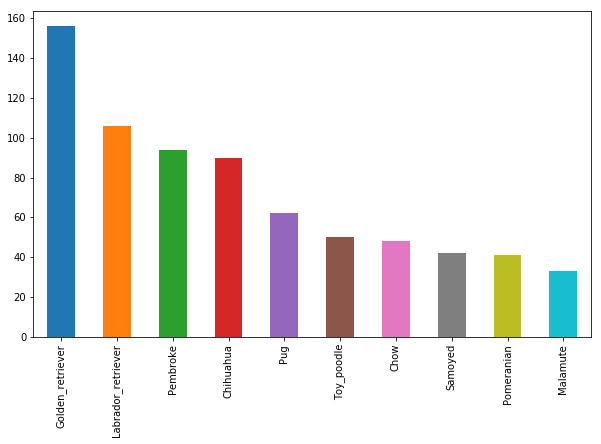

In [52]:
# Top 10 Dog Breeds Tweeted (excluding the Unclassified Dog Breeds )

plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
dog_breeds_df = twitter_archive_master_df[twitter_archive_master_df['Dog_Breed'] != 'Unknown']
dog_breeds_df.Dog_Breed.value_counts().nlargest(10).plot(kind='bar');

### 2. Pie Chart Showing the distribution of Dog Stages

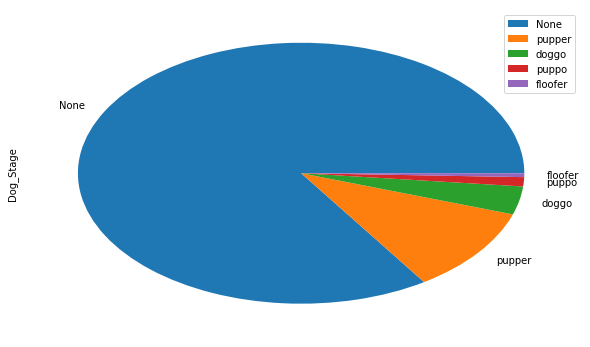

In [69]:
# Pie Chart Showing the distribution of Dog Stages

dog_stage_df = twitter_archive_master_df[['Dog_Stage']]
dog_stage_df.apply(pd.value_counts).plot.pie(subplots=True);

### 3. Popular Dog Stages (excluding the ones which are not classified)

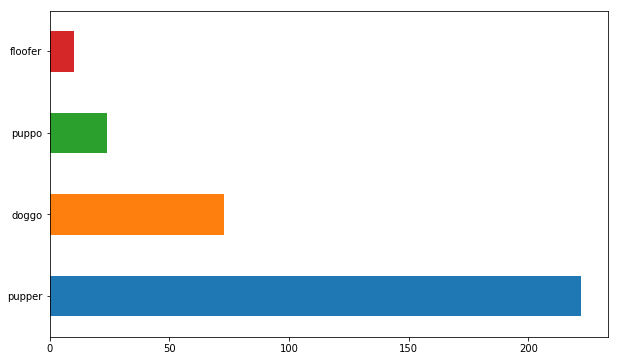

In [53]:
# Popular Dog Stages (excluding the ones which are not classified)

plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
dog_stages_df = twitter_archive_master_df[twitter_archive_master_df['Dog_Stage'] != 'None']
dog_stages_df.Dog_Stage.value_counts().plot(kind='barh');

### 4. Average Retweets and Likes for the top 10 Dog Breeds

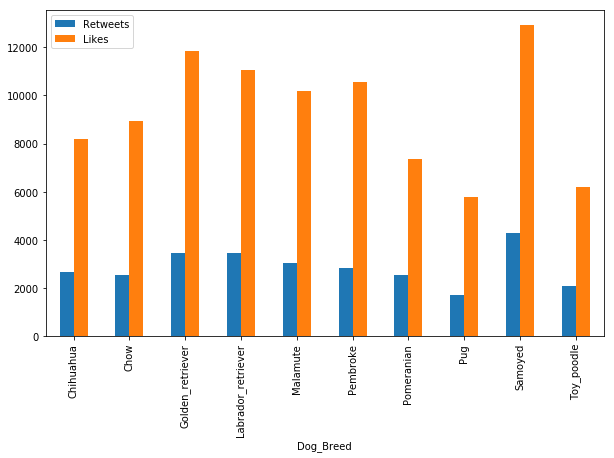

In [54]:
# Average Retweets and Likes for the top 10 Dog Breeds

plt.rcParams["figure.figsize"] = (10, 6) # (w, h)

dog_breed_retweet_df = twitter_archive_master_df[['Dog_Breed','Retweets','Likes']]
dog_breed_retweet_df = dog_breed_retweet_df[dog_breed_retweet_df['Dog_Breed'] != 'Unknown']

top10_counts = dog_breed_retweet_df.Dog_Breed.value_counts()
dog_breed_retweet_df[dog_breed_retweet_df.Dog_Breed.isin(top10_counts.nlargest(10).index)].groupby('Dog_Breed').mean().plot(kind='bar');


### 5. Retweets for a particular Dog_Stage

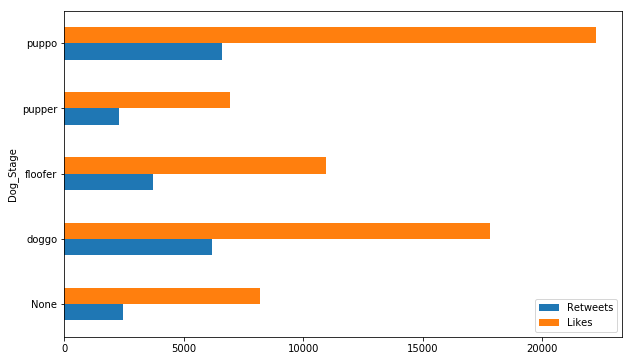

In [59]:
# Retweets for a particular Dog_Stage

dog_stage_retweet_df = twitter_archive_master_df[['Dog_Stage','Retweets','Likes']]
dog_stage_retweet_df.groupby('Dog_Stage').mean().plot(kind='barh');


### 6. Visualize Number of Tweets from different Sources

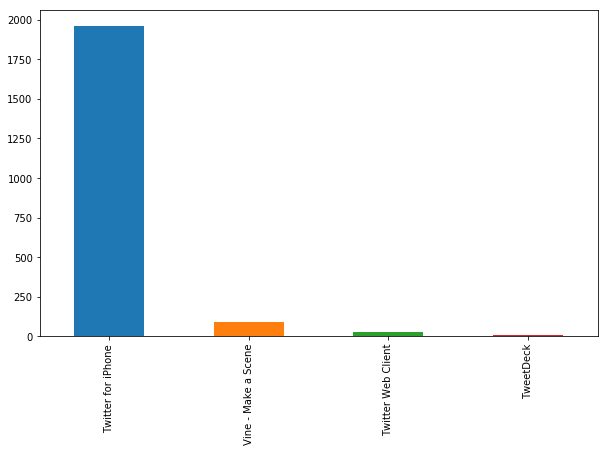

In [63]:
# Visualize Number of Tweets from different Sources

twitter_archive_master_df.Source.value_counts().plot(kind='bar');

### 7. Visualize the average number of Retweets/Likes for tweets from different Devices(Sources)

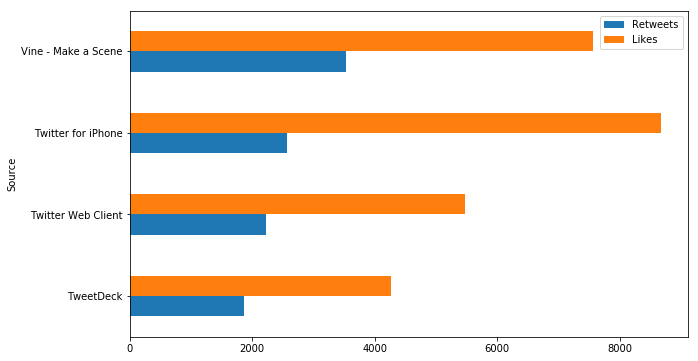

In [62]:
# Visualize the average number of Retweets/Likes for tweets from different Devices(Sources)

device_used_df = twitter_archive_master_df[['Source','Retweets','Likes']]
device_used_df.groupby('Source').mean().plot(kind='barh');

### 8. Visualize the correlation between the number for Retweets vs Likes

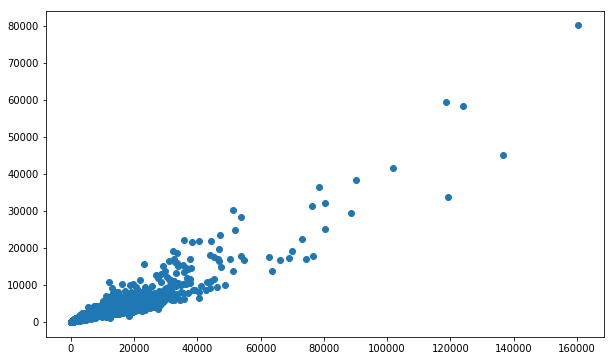

In [66]:
# Visualize the correlation between the number for Retweets vs Likes

x = twitter_archive_master_df.Likes
y = twitter_archive_master_df.Retweets

plt.scatter(x,y)
plt.show()